# Start-Ups Analysis India
This project is based on data collected from various open sources, w.r.t. the startups that hit the Indian market between year 1963-2021.
- It is a basic EDA project to get an overview of the "Indian StartUp Ecosystem".

### 1. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 2. Data Extraction 

In [2]:
#Load the data
s_data = pd.read_csv("Indian_Startup.csv")

In [3]:
s_data.head()

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Stage,Date
0,CollegeDekho,2015.0,Gurgaon,E-learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC","$35,000,000",Series B,Dec-21
1,BOX8,2012.0,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,"Anshul Gupta, Amit Raj",Tiger Global,"$40,000,000",NaN,Dec-21
2,Simpl,2015.0,Bangalore,Consumer Services,Simpl empowers merchants to build trusted rela...,"Nitya, Chaitra Chidanand","Valar Ventures, IA Ventures","$40,000,000",Series B,Dec-21
3,8i Ventures,2018.0,Mumbai,Venture Capital & Private Equity,8i is a Mumbai & Bangalore based early stage f...,Vikram Chachra,NaN,"$50,000,000",NaN,Dec-21
4,PayGlocal,2021.0,Bangalore,Financial Services,PayGlocal is a FinTech solving for global paym...,"Prachi Dharani, Rohit Sukhija, Yogesh Lokhande",Sequoia Capital India,"$4,900,000",Series A,Dec-21


In [4]:
s_data.tail()

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Stage,Date
1204,HobSpace,2019.0,Mumbai,EdTech,HobSpace is a platform for extra-curricular ac...,"Priya Goel Sheth, Harsh Jain","Siddharth Bhaskar Shah, Upsparks","$100,000",Pre-series A1,Jan-21
1205,DcodeAI,2020.0,New Delhi,EdTech,EMPOWER LEARNERS TO BE FUTURE READY USING AI,"Kartik Sharma, Ashish Aggarwal",S Chand,"$500,000",NaN,Jan-21
1206,Biocon Biologics,1978.0,Bangalore,BioTechnology,Biocon is a fully integrated pure play biosimi...,Kiran Mazumdar-Shaw,"Goldman Sachs, Tata Capital","$70,000,000",NaN,Jan-21
1207,KiranaKart,2020.0,Mumbai,E-commerce,A better model for instant grocery delivery in...,"Kaivalya Vohra, Aadit Palicha",Global Founders Capital,"$720,000",Pre-seed,Jan-21
1208,Meddo,2018.0,Gurgaon,Healthcare,Meddo is an end-to-end medical services provider,Saurabh Kochhar,"growX ventures, Venture Gurukool","$3,000,000",Pre-series A,Jan-21


In [5]:
s_data.shape

(1209, 10)

In [6]:
s_data.columns

Index(['Company/Brand', 'Founded', 'Headquarters', 'Sector', 'What it does',
       'Founder/s', 'Investor/s', 'Amount', 'Stage', 'Date '],
      dtype='object')

In [7]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   Headquarters   1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founder/s      1205 non-null   object 
 6   Investor/s     1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
 9   Date           1209 non-null   object 
dtypes: float64(1), object(9)
memory usage: 94.6+ KB


In [8]:
s_data.describe()

,Founded
count,1208.000000
mean,2016.655629
std,4.517364
min,1963.000000
25%,2015.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


In [9]:
s_data.isnull().sum()

Company/Brand      0
Founded            1
Headquarters       1
Sector             0
What it does       0
Founder/s          4
Investor/s        62
Amount             3
Stage            428
Date               0
dtype: int64

- Columns = { Founded, Headquarters, Founder/s, Investor/s, Amount, Stage}, comprise of a lot of Null values, that needs to be taken care of.

### 3. Data PreProcessing and EDA

In [10]:
#Stage Column isn't that Important and consists of alot of Null Values.
s_data.drop('Stage',axis=1, inplace=True)

In [11]:
s_data.head()

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Date
0,CollegeDekho,2015.0,Gurgaon,E-learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC","$35,000,000",Dec-21
1,BOX8,2012.0,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,"Anshul Gupta, Amit Raj",Tiger Global,"$40,000,000",Dec-21
2,Simpl,2015.0,Bangalore,Consumer Services,Simpl empowers merchants to build trusted rela...,"Nitya, Chaitra Chidanand","Valar Ventures, IA Ventures","$40,000,000",Dec-21
3,8i Ventures,2018.0,Mumbai,Venture Capital & Private Equity,8i is a Mumbai & Bangalore based early stage f...,Vikram Chachra,NaN,"$50,000,000",Dec-21
4,PayGlocal,2021.0,Bangalore,Financial Services,PayGlocal is a FinTech solving for global paym...,"Prachi Dharani, Rohit Sukhija, Yogesh Lokhande",Sequoia Capital India,"$4,900,000",Dec-21


In [12]:
#Which Indian City had the most Number of Startups?
s_data['Headquarters'].value_counts()

Bangalore             426
Mumbai                203
Gurugram              155
New Delhi             144
Pune                   47
                     ... 
Gandhinagar             1
Silvassa                1
Thiruvananthapuram      1
Faridabad               1
Telangana               1
Name: Headquarters, Length: 70, dtype: int64

In [13]:
## Check the Top 10 Cities that had boosted the Indian Startups
s_data['Headquarters'].value_counts().head(10)

Bangalore    426
Mumbai       203
Gurugram     155
New Delhi    144
Pune          47
Chennai       40
Noida         34
Hyderabad     34
Jaipur        11
Ahmedabad     11
Name: Headquarters, dtype: int64

In [14]:
top_10_cities = pd.DataFrame(s_data['Headquarters'].value_counts().head(10))

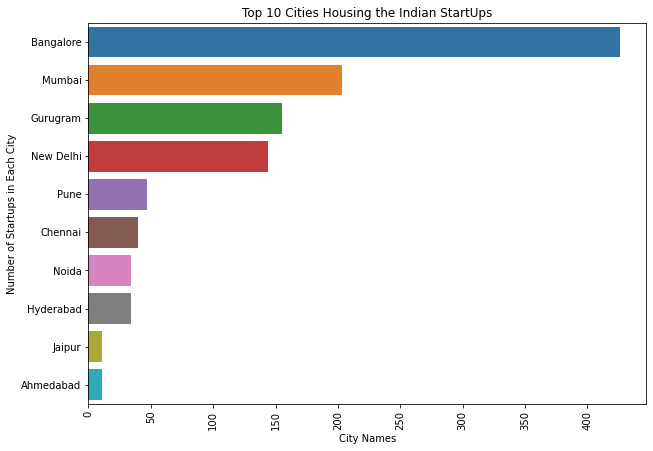

In [15]:
plt.figure(figsize=(10,7))
sns.barplot(data = s_data, x=top_10_cities['Headquarters'], y=top_10_cities.index )
plt.xticks(rotation=90)
plt.xlabel("City Names")
plt.ylabel("Number of Startups in Each City")
plt.title("Top 10 Cities Housing the Indian StartUps")
plt.show()

- Bangalore has been leading the Startup space till date in India.
- Bangalore, Mumbai, Gurugram, and New Delhi comprise of majority of Indian Start-Up origins.

In [16]:
#Lets' Check Which sector has observed and driven most start-ups
s_data['Sector'].value_counts()

FinTech                   121
EdTech                    102
Financial Services         61
Food & Beverages           37
E-commerce                 37
                         ... 
Wholesale                   1
Automobile                  1
Environmental Services      1
Merchandise                 1
Fashion & Lifestyle         1
Name: Sector, Length: 256, dtype: int64

In [17]:
#Top 10 Sectors, that witnessed majority of Start-Ups in India
s_data['Sector'].value_counts().head(10)

FinTech                              121
EdTech                               102
Financial Services                    61
Food & Beverages                      37
E-commerce                            37
Information Technology & Services     36
Healthcare                            34
Automotive                            33
E-learning                            25
Consumer Goods                        24
Name: Sector, dtype: int64

In [18]:
top_10_sectors = pd.DataFrame(s_data['Sector'].value_counts().head(10))

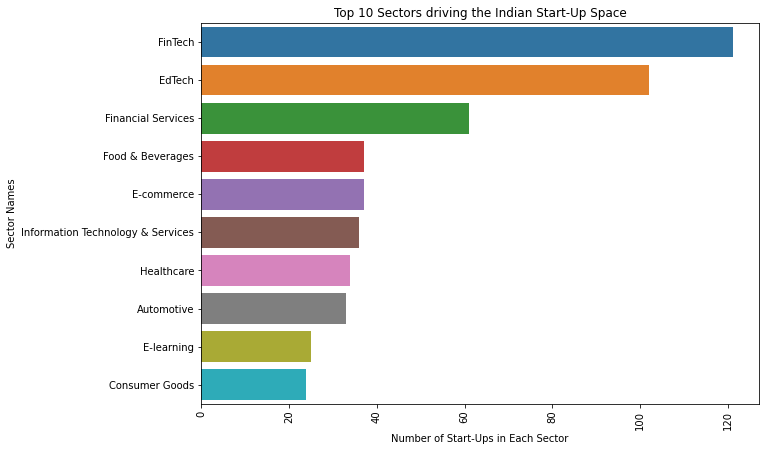

In [19]:
plt.figure(figsize=(10,7))
sns.barplot(data = s_data, x = top_10_sectors['Sector'], y = top_10_sectors.index)
plt.xticks(rotation=90)
plt.xlabel("Number of Start-Ups in Each Sector")
plt.ylabel("Sector Names")
plt.title("Top 10 Sectors driving the Indian Start-Up Space")
plt.show()

- **FinTech** and **EdTech** Sectors have been driving the startup culture majorly in India.
- This is also the reason for India being named as "Father of EdTechs".

In [20]:
# Top Investors in Indian Start-Up Space
s_data['Investor/s'].value_counts()

Inflection Point Ventures                                                     24
Tiger Global                                                                  11
Venture Catalysts                                                             11
Elevation Capital                                                              7
Titan Capital                                                                  6
                                                                              ..
Arvind Venugopal Nair, Amritendu Mukherjee                                     1
Rajasthan Venture Capital Fund                                                 1
Covalent, Double Peak, GenBlock Capital, Ledger Prime, MEXC Global, Synaps     1
Vijayan                                                                        1
growX ventures, Venture Gurukool                                               1
Name: Investor/s, Length: 938, dtype: int64

In [21]:
# Top 10 Investors in Indian Start-Up Space
s_data['Investor/s'].value_counts().head(10)

Inflection Point Ventures    24
Tiger Global                 11
Venture Catalysts            11
Elevation Capital             7
Titan Capital                 6
We Founder Circle             6
Sequoia Capital India         5
Anicut Angel Fund             5
Kalaari Capital               5
Sixth Sense Ventures          5
Name: Investor/s, dtype: int64

In [22]:
top_10_investors = pd.DataFrame(s_data['Investor/s'].value_counts().head(10))

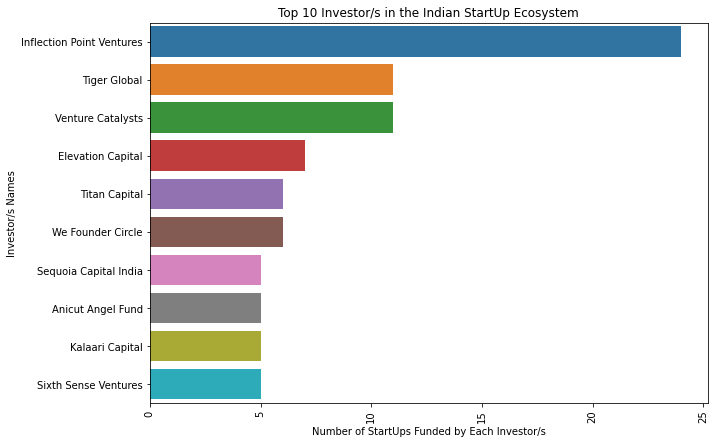

In [23]:
plt.figure(figsize=(10,7))
sns.barplot(data = s_data, x = top_10_investors['Investor/s'], y= top_10_investors.index)
plt.xticks(rotation=90)
plt.xlabel("Number of StartUps Funded by Each Investor/s")
plt.ylabel("Investor/s Names")
plt.title("Top 10 Investor/s in the Indian StartUp Ecosystem")
plt.show()

- **Inflection Point Ventures, Tiger Global** and **Venture Catalysts** are top 3 investors, that have fueled the finances of most number of Indian Start-Ups.

##### Data Segregation
--- Analyse the data w.r.t. Founding years of Majority of Start-Ups

In [24]:
s_data['Founded'].value_counts()

2020.0    237
2019.0    177
2018.0    143
2015.0    129
2016.0    118
2017.0    112
2021.0     76
2014.0     57
2011.0     34
2012.0     31
2013.0     22
2008.0     15
2010.0     14
2009.0      9
2000.0      6
2007.0      6
2006.0      3
1994.0      2
1989.0      2
2004.0      2
1998.0      2
2002.0      2
1999.0      2
2005.0      1
1963.0      1
2003.0      1
1993.0      1
1991.0      1
1984.0      1
1978.0      1
Name: Founded, dtype: int64

In [25]:
s_data['Founded'].value_counts().head(10)

2020.0    237
2019.0    177
2018.0    143
2015.0    129
2016.0    118
2017.0    112
2021.0     76
2014.0     57
2011.0     34
2012.0     31
Name: Founded, dtype: int64

In [26]:
top_10_years = pd.DataFrame(s_data['Founded'].value_counts().head(10))

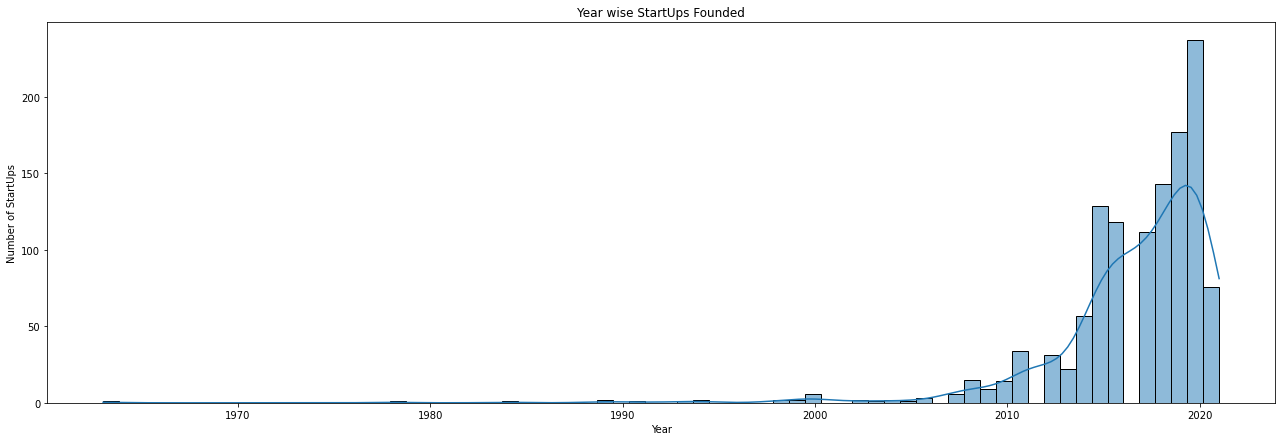

In [27]:
plt.figure(figsize=(22,7))
sns.histplot(s_data['Founded'], kde=True, bins=70)
plt.title("Year wise StartUps Founded")
plt.xlabel("Year")
plt.ylabel("Number of StartUps")
plt.show()

- (2010 - 2021) Has been a decade with higest number of StartUps emerging in various sectors, especially in **FinTech** and **EdTech** space.

##### Data Processing w.r.t. Amount Raised by Start-Ups

In [28]:
s_data['Amount_New'] = pd.DataFrame(s_data['Amount'].str.replace('$','',regex=True))
s_data['Amount_New'] = s_data['Amount_New'].str.replace(',','',regex = True)
s_data['Amount_New'] = pd.to_numeric(s_data['Amount_New'], errors='coerce')
s_data.head()

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Date,Amount_New
0,CollegeDekho,2015.0,Gurgaon,E-learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC","$35,000,000",Dec-21,35000000.0
1,BOX8,2012.0,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,"Anshul Gupta, Amit Raj",Tiger Global,"$40,000,000",Dec-21,40000000.0
2,Simpl,2015.0,Bangalore,Consumer Services,Simpl empowers merchants to build trusted rela...,"Nitya, Chaitra Chidanand","Valar Ventures, IA Ventures","$40,000,000",Dec-21,40000000.0
3,8i Ventures,2018.0,Mumbai,Venture Capital & Private Equity,8i is a Mumbai & Bangalore based early stage f...,Vikram Chachra,NaN,"$50,000,000",Dec-21,50000000.0
4,PayGlocal,2021.0,Bangalore,Financial Services,PayGlocal is a FinTech solving for global paym...,"Prachi Dharani, Rohit Sukhija, Yogesh Lokhande",Sequoia Capital India,"$4,900,000",Dec-21,4900000.0


### Total Funds raised by Start-Ups w.r.t. Each Headquarters across India

In [29]:
# Grouping the Data w.r.t. "Headquarters"
# reset_index (drop = True) will delete the index instead of inserting it back into the columns of the DataFrame.
# reset_index (drop = False) will keep the index into the cols. of DataFrame
data_group = s_data.groupby(by = 'Headquarters').sum().drop('Founded', axis=1).reset_index(drop=False)

In [30]:
data_group

,Headquarters,Amount_New
0,Ahmadabad,4.300000e+06
1,Ahmedabad,1.981550e+08
2,Ambernath,2.000000e+05
3,Andheri,1.000000e+06
4,Bangalore,1.574084e+10
...,...,...
65,The Nilgiris,2.000000e+05
66,Thiruvananthapuram,0.000000e+00
67,Trivandrum,3.000000e+05
68,Vadodara,1.000000e+07


In [31]:
data_group.head(10)

,Headquarters,Amount_New
0,Ahmadabad,4.300000e+06
1,Ahmedabad,1.981550e+08
2,Ambernath,2.000000e+05
3,Andheri,1.000000e+06
4,Bangalore,1.574084e+10
5,Beijing,2.000000e+08
6,Bhilwara,8.000000e+06
7,Bhubaneswar,3.000000e+07
8,Chandigarh,2.410000e+07
9,Chennai,7.214400e+08


In [32]:
data_top_group = data_group.sort_values(by = 'Amount_New',ascending = False).head(10)

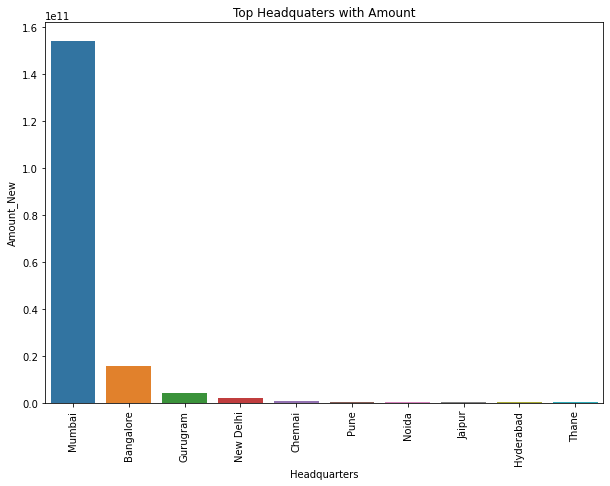

In [33]:
plt.figure(figsize = (10,7))
sns.barplot(x = data_top_group['Headquarters'],y=data_top_group['Amount_New']) 
plt.xticks(rotation=90)
plt.title("Top Headquaters with Amount")
plt.show()

* **Mumbai, Banglore, Gurugram** and **New Delhi** are the major cities to finance the Indian StartUp Ecosystem.

### Total Funds raised by Start-Ups w.r.t. Each Investor/s across India

In [34]:
data_group_invest = s_data.groupby(by = 'Investor/s').sum().drop('Founded', axis=1).reset_index (drop=False)

In [35]:
data_group_invest

,Investor/s,Amount_New
0,"$1,000,000",0.0
1,"$22,000,000",0.0
2,"$5,000,000",0.0
3,$Undisclosed,0.0
4,"021 Capital, Sparrow Capital",1800000.0
...,...,...
933,http://100x.vc/,2500000.0
934,"iSeed, Titan Capital",500000.0
935,pi Ventures,1800000.0
936,"responsAbility Investments, Blue Orchard",10000000.0


In [36]:
data_top_invest = data_group_invest.sort_values(by = 'Amount_New', ascending = False).head(10)

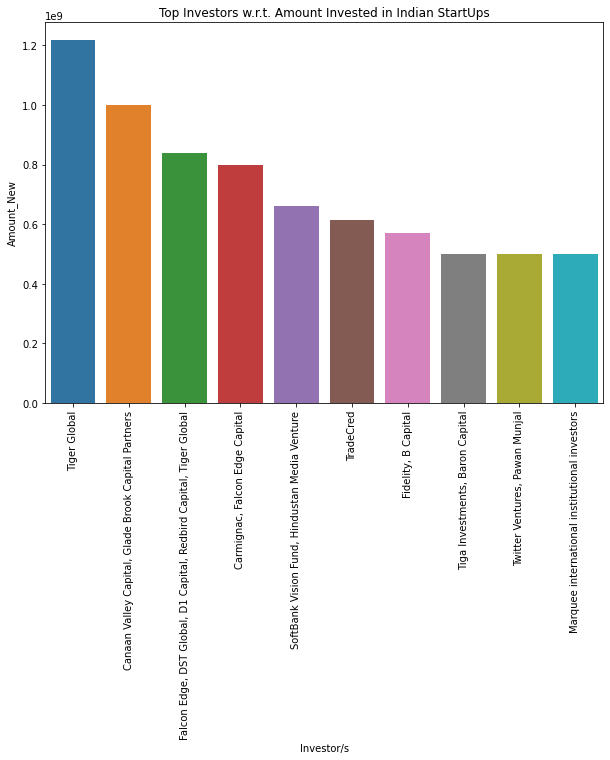

In [37]:
plt.figure(figsize = (10,7))
sns.barplot(x = data_top_invest['Investor/s'],y=data_top_invest['Amount_New']) 
plt.xticks(rotation=90)
plt.title("Top Investors w.r.t. Amount Invested in Indian StartUps")
plt.show()

- **Tiger Global, Canaan Valley Capital, Falcon Edge** and **DST Global** are the major investor/s fueling the growth on Indian Start-Up Ecosystem.

## Conlusion:

` Few Notable outcomes of this EDA are as Follows:
* FinTech, and EdTech sectors are the leaders of Start-Up Ecosystem in India. 
* Major players like PayTM, PhonePe, BharatPe, CRED in FinTech Industry and BYJU'S, UpGrad, SimpliLearn in EdTech Space.
* Banglore has housed most number of StartUps, and thus known as the "StartUp Capital of India"
* Mumbai city, has emerged as a major financer of the Indian StartUps.
* Tiger Global is the largest venture capitalist, that has invested in Indian StartUps.
    

## Thank You!